# Linear Regression - scratch

## Gradient descent

In [6]:
import numpy as np


class LinearRegression:

    def __init__(self, lr = 0.001, iteration=1000):
        self.lr = lr
        self.iteration = iteration
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iteration):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [9]:
import numpy as np
X = np.array([2,3,4,5,6,7,8,9,10]).reshape(-1,1)
y = np.array([200,300,400,500,600,700,800,900,1000])

model = LinearRegression(lr=0.01, iteration=100)
model.fit(X,y)

In [23]:
model.predict(np.array([9]))

896.7927455492309

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from LinearRegression import LinearRegression

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

reg = LinearRegression(lr=0.01)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

ModuleNotFoundError: No module named 'sklearn'

## Approach1: covariance and variance method

In [6]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
#Chat: https://copilot.microsoft.com/chats/QwsxrMq6tuRR45XcGPHSW

In [39]:
xs=np.array([2,3,4,5,6,7,8,9,10])
ys=np.array([200,300,400,600,600,700,800,900,1000])

### finding m,b using covariance and variance

In [83]:
def find_bestfit_slope_intercept(xs,ys):
    # y = mx + b
    # m = y/x - b/x
    m=((np.mean(xs)*np.mean(ys))-np.mean(xs*ys))/((np.mean(xs)*np.mean(xs))-np.mean(xs*xs))
    b=np.mean(ys)-(m*np.mean(xs))
    return m,b

"""def find_bestfit_slope_intercept(xs,ys):
    m=((mean(xs)*mean(ys))-mean(xs*ys))/((mean(xs)*mean(xs))-mean(xs*xs))
    b=mean(ys)-(m*mean(xs))
    return m,b"""

print(find_bestfit_slope_intercept(xs,ys))
m,c=find_bestfit_slope_intercept(xs,ys)

(98.33333333333346, 21.111111111110404)


### On train set

In [59]:

y_pred=[(m*x+c)for x in xs]
y_pred

[217.77777777777732,
 316.11111111111074,
 414.44444444444423,
 512.7777777777777,
 611.1111111111111,
 709.4444444444446,
 807.777777777778,
 906.1111111111115,
 1004.444444444445]

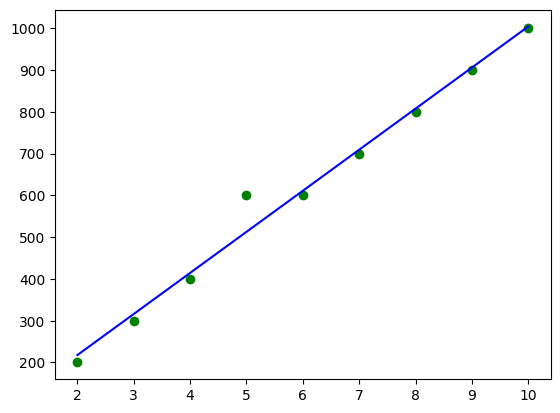

In [60]:
plt.scatter(xs[:],ys[:],c='g')
plt.plot(xs[:],y_pred[:],c='b')

In [61]:
def square_error(ys_line,ys_org):
    #Squared Error = Σ(yᵢ - ŷᵢ)²
    s=sum((ys_line-ys_org)*(ys_line-ys_org))
    return s
ey_reg=square_error(y_pred, ys)
ey_reg

8722.222222222215

In [62]:
y_mean=[np.mean(ys) for y in ys]
y_mean

[611.1111111111111,
 611.1111111111111,
 611.1111111111111,
 611.1111111111111,
 611.1111111111111,
 611.1111111111111,
 611.1111111111111,
 611.1111111111111,
 611.1111111111111]

In [63]:
#print(y_mean)
ey_line=square_error(ys,y_mean)
ey_line

588888.888888889

In [64]:
r2_score=1-(ey_reg/ey_line)
r2_score

0.9851886792452831

### on new data

In [72]:
# Generate 20 more records for xs and ys (example values)
xs = np.arange(11, 31)  # Values from 11 to 30
ys = np.linspace(1100, 3000, 20)  # Values from 1100 to 3000, evenly spaced


In [73]:
y_pred=[(m*x+c)for x in xs]
y_pred

[1102.7777777777785,
 1201.1111111111118,
 1299.4444444444453,
 1397.7777777777787,
 1496.1111111111122,
 1594.4444444444457,
 1692.7777777777792,
 1791.1111111111127,
 1889.4444444444462,
 1987.7777777777796,
 2086.111111111113,
 2184.4444444444466,
 2282.77777777778,
 2381.111111111113,
 2479.4444444444466,
 2577.77777777778,
 2676.1111111111136,
 2774.444444444447,
 2872.7777777777806,
 2971.111111111114]

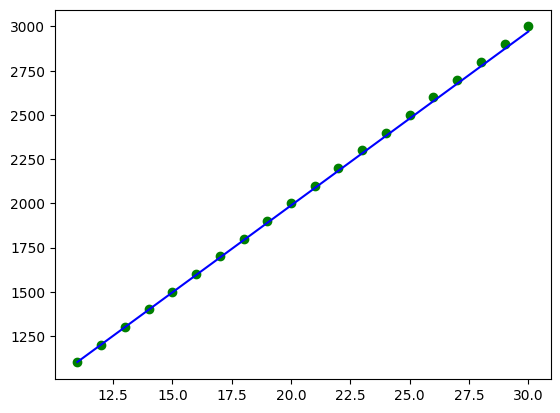

In [74]:
plt.scatter(xs[:],ys[:],c='g')
plt.plot(xs[:],y_pred[:],c='b')

In [68]:
def square_error(ys_line,ys_org):
    #Squared Error = Σ(yᵢ - ŷᵢ)²
    s=sum((ys_line-ys_org)*(ys_line-ys_org))
    return s
ey_reg=square_error(y_pred, ys)
ey_reg

8722.222222222215

In [75]:
y_mean=[np.mean(ys) for y in ys]
y_mean

[2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0,
 2050.0]

In [76]:
#print(y_mean)
ey_line=square_error(ys,y_mean)
ey_line

6650000.0

In [77]:
r2_score=1-(ey_reg/ey_line)
r2_score

0.9986883876357561

In [ ]:
#R² = 1 - (SSres / SStot)
# SSres = Σ(yᵢ - ŷᵢ)²
# SStot = Σ(yᵢ - ȳ)²
#where: * yᵢ is the actual y-value for the i-th data point * ŷᵢ is the predicted y-value for the i-th data point

#SStot is the total sum of squares. It represents the total variation in the dependent variable.

#where:
#   * yᵢ is the actual y-value for the i-th data point
#   * ȳ is the mean of the actual y-values
"""
Interpretation:

R² = 1: Indicates a perfect fit. The model explains all the variance in the dependent variable.
R² = 0: Indicates that the model does not explain any of the variance in the dependent variable.
0 < R² < 1: Indicates the proportion of variance explained by the model. For example, an R² of 0.8 means that the model explains 80% of the variance in the dependent variable."""

### plot prediction

1.0


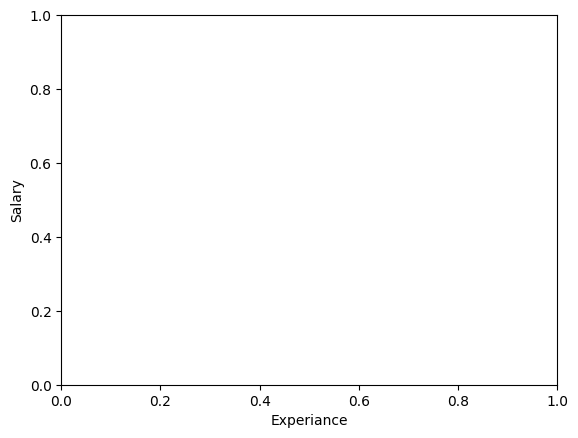

In [34]:
plt.xlabel("Experiance")
plt.ylabel("Salary")
print(r2_score)
def predict(x):
    yp=m*x+c
    plt.scatter(x,yp,c='r')

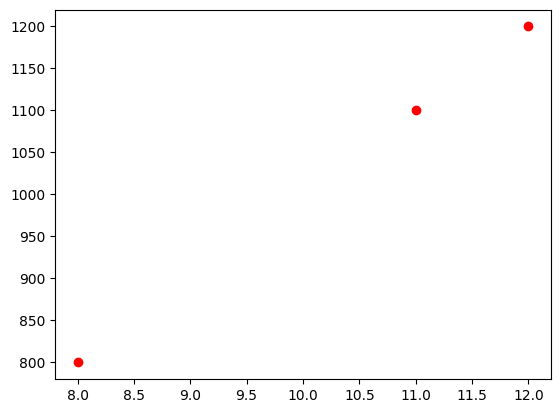

In [35]:
predict(8)
predict(11)
predict(12)
plt.show()

## Approach2: iterate through a range of m and b values

We'll use a brute-force approach to iterate through a range of m and b values, calculate the squared error for each combination, and identify the combination that yields the minimum squared error.

In [84]:
import numpy as np

def find_bestfit_slope_intercept(xs,ys):
    # y = mx + b
    # m = y/x - b/x
    m=((np.mean(xs)*np.mean(ys))-np.mean(xs*ys))/((np.mean(xs)*np.mean(xs))-np.mean(xs*xs))
    b=np.mean(ys)-(m*np.mean(xs))
    return m,b

def calculate_squared_error(xs, ys, m, b):
  """Calculates the squared error for given m and b."""
  y_pred = m * xs + b
  squared_error = np.sum((ys - y_pred)**2)
  return squared_error

def find_best_fit_line(xs, ys, m_range, b_range):
  """Finds the best-fit line by minimizing squared error."""
  min_error = float('inf')  # Initialize with a very large value
  best_m, best_b = None, None

  for m in m_range:
    for b in b_range:
      error = calculate_squared_error(xs, ys, m, b)
      if error < min_error:
        min_error = error
        best_m, best_b = m, b

  return best_m, best_b, min_error

In [90]:
# Example usage
#xs = np.array([1, 2, 3, 4, 5])
#ys = np.array([2, 4, 5, 4, 5])

xs=np.array([2,3,4,5,6,7,8,9,10])
ys=np.array([200,300,400,600,600,700,800,900,1000])
find_bestfit_slope_intercept(xs,ys)


(98.33333333333346, 21.111111111110404)

In [ ]:
# Define ranges for m and b
m_range = np.arange(90, 99, 1)   # Values from 0 to 2 with step 0.1
b_range = np.arange(0, 25, 1)   # Values from 0 to 3 with step 0.1
m_range , b_range

In [89]:

# Find the best-fit line
best_m, best_b, min_error = find_best_fit_line(xs, ys, m_range, b_range)

print(f"Best fit line: y = {best_m:.2f}x + {best_b:.2f}")
print(f"Minimum squared error: {min_error:.2f}")

Best fit line: y = 98.00x + 23.00
Minimum squared error: 8729.00
